In [1]:
import pandas as pd
import numpy as np
import sklearn
import os
import matplotlib.pyplot as plt
import time

In [2]:
# 加载数据库的列名
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

# 加载训练集和测试集
train_path=r"F:\Jupyter\kaggle\data\NSL-KDD\KDDTrain+.txt"
test_path=r"F:\Jupyter\kaggle\data\NSL-KDD\KDDTest+.txt"
df = pd.read_csv(train_path, header=None, names = col_names)
df_test = pd.read_csv(test_path, header=None, names = col_names)
df.drop('difficulty_level',inplace=True,axis=1)
df_test.drop('difficulty_level',inplace=True,axis=1)
#数据集的shape
print('Dimensions of the Training set:',df.shape)
print('Dimensions of the Test set:',df_test.shape)

Dimensions of the Training set: (125973, 42)
Dimensions of the Test set: (22544, 42)


# 分离离散型特征

In [3]:
#df_categorical_values————存储了包含'protocol_type'，'service'和'flag'。的训练集数据
#testdf_categorical_values——'protocol_type'，'service'和'flag'的测试集数据
from sklearn.preprocessing import LabelEncoder,OneHotEncoder


categorical_columns=['protocol_type', 'service', 'flag'] 
#将这三个离散特征分离出来
df_categorical_values = df[categorical_columns]
testdf_categorical_values = df_test[categorical_columns]

In [4]:
# protocol type
unique_protocol=sorted(df.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]
# service
unique_service=sorted(df.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]
# flag
unique_flag=sorted(df.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]
# 合并
dumcols=unique_protocol2 + unique_service2 + unique_flag2
print(dumcols)

#同理于测试集，由于测试集和训练集只有service有区别，所以只要对service特别处理
unique_service_test=sorted(df_test.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'serv

In [5]:
#df_categorical_values_enc————将dumcols中的类别标签转换为数值。
#testdf_categorical_values_enc同理
df_categorical_values_enc=df_categorical_values.apply(LabelEncoder().fit_transform)
print(df_categorical_values_enc.head())
# test set
testdf_categorical_values_enc=testdf_categorical_values.apply(LabelEncoder().fit_transform)

   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9


In [6]:
# df_cat_data----训练集每一行对于提取出来的每个特征作为列向量，若有这个特征就把值设为1，没有就是0
# testdf_cat_data

enc = OneHotEncoder()
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(),columns=dumcols)
# test set
testdf_categorical_values_encenc = enc.fit_transform(testdf_categorical_values_enc)
testdf_cat_data = pd.DataFrame(testdf_categorical_values_encenc.toarray(),columns=testdumcols)

In [7]:
trainservice = df['service'].tolist()
testservice = df_test['service'].tolist()

train_difference = list(set(trainservice) - set(testservice))
test_difference = list(set(testservice) - set(trainservice))

print(train_difference)
print(test_difference)

string = 'service_'
train_difference = [string + x for x in train_difference]
test_difference = [string + x for x in test_difference]

['http_2784', 'red_i', 'harvest', 'aol', 'http_8001', 'urh_i']
[]


In [8]:
for col in train_difference:
    testdf_cat_data[col] = 0

for col in test_difference:
    df_cat_data[col] = 0

In [9]:
newdf=df.join(df_cat_data)
newdf.drop('flag', axis=1, inplace=True)
newdf.drop('protocol_type', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)
# test data
newdf_test=df_test.join(testdf_cat_data)
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)
print(newdf.shape)
print(newdf_test.shape)

(125973, 123)
(22544, 123)


In [10]:
labeldf=newdf['label']
labeldf_test=newdf_test['label']

#把.洗掉
labeldf = labeldf.str.rstrip('.')
labeldf_test = labeldf_test.str.rstrip('.')
newlabeldf=labeldf.replace({'normal':0,
                            'neptune':1,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 
                             'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2,
                             'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'worm': 3,
                             'httptunnel': 4,'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
newlabeldf_test=labeldf_test.replace({'normal' : 0,
                             'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 
                             'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2,
                             'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'worm': 3,
                             'httptunnel': 4,'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})

newdf['label'] = newlabeldf
newdf_test['label'] = newlabeldf_test
# print(newdf['label'].tail())

In [11]:
to_drop_DoS = [2,3,4]
to_drop_Probe = [1,3,4]
to_drop_R2L = [1,2,4]
to_drop_U2R = [1,2,3]

DoS_df=newdf[~newdf['label'].isin(to_drop_DoS)];
Probe_df=newdf[~newdf['label'].isin(to_drop_Probe)];
R2L_df=newdf[~newdf['label'].isin(to_drop_R2L)];
U2R_df=newdf[~newdf['label'].isin(to_drop_U2R)];

print('Train:')
print('Dimensions of DoS:' ,DoS_df.shape)
print('Dimensions of Probe:' ,Probe_df.shape)
print('Dimensions of R2L:' ,R2L_df.shape)
print('Dimensions of U2R:' ,U2R_df.shape)

Train:
Dimensions of DoS: (113270, 123)
Dimensions of Probe: (78999, 123)
Dimensions of R2L: (68338, 123)
Dimensions of U2R: (67395, 123)


# Step 2: 特征缩放

In [12]:
# 将数据集分割为特征（X）和目标变量（Y）
# assign X as a dataframe of feautures and Y as a series of outcome variables
X = newdf.drop('label',axis=1)
Y = newdf.label

X_test = newdf_test.drop('label',axis=1)
Y_test = newdf_test.label

# 寻找最佳的特征向量
X_DoS = DoS_df.drop('label',axis=1)
Y_DoS = DoS_df.label
X_Probe = Probe_df.drop('label',axis=1)
Y_Probe = Probe_df.label
X_R2L = R2L_df.drop('label',axis=1)
Y_R2L = R2L_df.label
X_U2R = U2R_df.drop('label',axis=1)
Y_U2R = U2R_df.label

### 保存功能名称列表以备后用（每个攻击类别都相同）。在此阶段将删除列名。

In [13]:
#colNames 就是一个包含 X_DoS 中所有列名称的列表
colNames=list(X)
colNames_test=list(X_test)

## 标准化：StandardScaler() 
``` python
scaler1 = preprocessing.StandardScaler().fit(X_DoS) #这行代码创建了一个 StandardScaler 对象 scaler1，并使用 X_DoS 数据计算了均值和标准差。
X_DoS=scaler1.transform(X_DoS) #这行代码将 scaler1 的缩放参数应用于 X_DoS，实现标准化。标准化后的数据将具有零均值和单位标准差,并将结果保存回 X_DoS。
print(X_DoS.std(axis=0))#代码使用 std 函数检查了每种攻击类型的训练数据的标准差是否为1。如果数据已经正确地标准化，那么其标准差应该接近1。
```

In [14]:
from sklearn import preprocessing
#全部特征
scaler1 = preprocessing.StandardScaler().fit(X)
X=scaler1.transform(X) 

scaler2 = preprocessing.StandardScaler().fit(X_test)
X_test=scaler2.transform(X_test) 

#寻找特征向量
scaler3 = preprocessing.StandardScaler().fit(X_DoS)
X_DoS=scaler3.transform(X_DoS) 
scaler4 = preprocessing.StandardScaler().fit(X_Probe)
X_Probe=scaler4.transform(X_Probe) 
scaler5 = preprocessing.StandardScaler().fit(X_R2L)
X_R2L=scaler5.transform(X_R2L) 
scaler6 = preprocessing.StandardScaler().fit(X_U2R)
X_U2R=scaler6.transform(X_U2R) 

# Step 3: Feature Selection:（RFE）
获取每个特征的方式：将训练集切割成四个部分（normal加上对应的攻击部分）来获取四种攻击方式的特征             

首先，使用 RFE 从 NSL-KDD 数据集中选择一部分特征，这些特征对入侵检测任务有较高的相关性。

## dos

In [15]:
print(__doc__)
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
class_weights={0:1,1:14.66}

Dos_clf = RandomForestClassifier(random_state=0,class_weight=class_weights)
rfecv_dos = RFECV(estimator=Dos_clf,step=1,cv=10,scoring='accuracy')
rfecv_dos.fit(X_DoS, Y_DoS)

print("Optimal number of features : %d" % rfecv_dos.n_features_)
print("Ranking of features : %s" % rfecv_dos.ranking_)



Automatically created module for IPython interactive environment
Optimal number of features : 75
Ranking of features : [ 1  1  1  1  1  1  1  1  1  1  1  5  1  1 20  1 16  8  2  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 10 45 11 14 38
 36 18 22 23  1  1 21  1  1 40 42  1  1  1 27  7  1  1 19 25 15  1  1 12
  6 13 44  1 46 24  1  1 29 30  3  1 34  1 26 33 37 28  1  1 32 47 39  1
 17 43 41 31 35  1  1  1  1  4  1  1  9  1  1  1  1  1  1  1  1  1  1  1
  1 48]


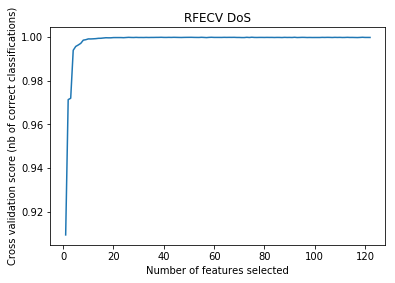

In [16]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.title('RFECV DoS')
plt.plot(range(1, len(rfecv_dos.grid_scores_) + 1), rfecv_dos.grid_scores_)
plt.show()

In [17]:
print(rfecv_dos.grid_scores_)

[0.90953469 0.97135161 0.97196961 0.99388189 0.99563876 0.99630091
 0.9970513  0.99850801 0.99871989 0.99908185 0.99906419 0.99912599
 0.99920545 0.9993467  0.99937318 0.99949678 0.99961155 0.99957624
 0.99958507 0.99968218 0.999691   0.999691   0.99969101 0.99963803
 0.99971749 0.99979695 0.99974397 0.99971749 0.99977929 0.99972632
 0.99973515 0.99971749 0.99976163 0.99972632 0.9997528  0.9997528
 0.99977929 0.99977929 0.9998146  0.99976163 0.9997528  0.99978812
 0.99976163 0.99980577 0.99977929 0.9997528  0.99973515 0.99977046
 0.99978812 0.99979695 0.99980578 0.99977046 0.9997528  0.99974397
 0.9998146  0.9997528  0.99968218 0.99977929 0.99982343 0.99976163
 0.99976163 0.99976163 0.9997528  0.99979694 0.99977046 0.99978812
 0.99977929 0.99979694 0.99974397 0.99974398 0.99969983 0.99969983
 0.9998146  0.99972632 0.99984109 0.9997528  0.99973515 0.99976163
 0.99976163 0.99974397 0.99977046 0.9997528  0.99976163 0.99972631
 0.99976163 0.9997528  0.99970866 0.99978812 0.99974397 0.99976

可以观察到，在第14个特征左右，已经趋于第一次稳定了。那我们就取前9个特征

In [17]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
class_weights={0:1,1:14.66}
Dos_clf = RandomForestClassifier(random_state=0,class_weight=class_weights)

rfe_dos = RFE(estimator=Dos_clf, n_features_to_select=21, step=1)
rfe_dos.fit(X_DoS, Y_DoS)
X_rfeDoS=rfe_dos.transform(X_DoS)
true=rfe_dos.support_
rfecolindex_DoS=[i for i, x in enumerate(true) if x]
rfecolname_DoS=list(colNames[i] for i in rfecolindex_DoS)

## Probe

In [19]:
class_weights={0:1,2:57.775}
Probe_clf = RandomForestClassifier(random_state=0,class_weight=class_weights)

rfecv_probe = RFECV(estimator=Probe_clf,step=1,cv=10,scoring='accuracy')
rfecv_probe.fit(X_Probe, Y_Probe)



RFECV(cv=10,
   estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 1, 2: 57.775},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

In [20]:
print("Optimal number of features : %d" % rfecv_probe.n_features_)
print("Ranking of features : %s" % rfecv_probe.ranking_)

Optimal number of features : 65
Ranking of features : [ 1  1  1  9  6  5  1  1  1  1  1 18  1  1 36  1 20 27  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 53 55  1 54 58
 38 21 23 52 17  1 32  1  1 42 44  1  1  1  1  8 26  1 56 15 39 24 47 30
 49 33 14 40 22 11 37 19 35  7 29  3  1  1  1 13  1 43  1 31 34 45 12  1
 51  1 41 48 16  1  1 25  1  4  1 10 28 46  2  1  1  1  1  1  1  1  1 50
  1 57]


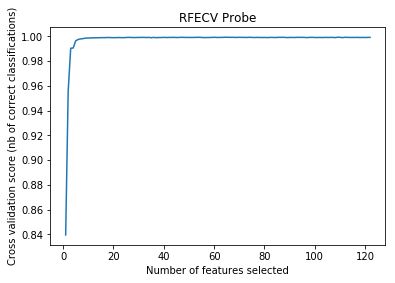

In [21]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.title('RFECV Probe')
plt.plot(range(1, len(rfecv_probe.grid_scores_) + 1), rfecv_probe.grid_scores_)
plt.show()

In [22]:
print(rfecv_probe.grid_scores_)

[0.8394789  0.95575892 0.99042972 0.99064491 0.99650627 0.9975443
 0.99799999 0.99826581 0.99864555 0.99865821 0.99879744 0.9988734
 0.99886074 0.99894936 0.999      0.99902532 0.99903797 0.9991519
 0.99905062 0.99898734 0.999      0.99912658 0.99902531 0.99901265
 0.99911393 0.99922783 0.99913923 0.99907593 0.99910126 0.99917721
 0.99917721 0.99922785 0.99910125 0.99921519 0.99894936 0.99920253
 0.99898733 0.99910125 0.99910126 0.99921519 0.99911392 0.99917721
 0.99917722 0.9992405  0.99911392 0.99916454 0.99929113 0.99920253
 0.99917721 0.99917721 0.99915189 0.99916456 0.99926581 0.99926581
 0.99917722 0.99905062 0.9990886  0.99912658 0.99918987 0.99929113
 0.99916456 0.99916456 0.99921519 0.99929114 0.9993291  0.99924051
 0.99925317 0.99924049 0.99916455 0.99926581 0.99920253 0.99922784
 0.99913923 0.99930381 0.99918987 0.99910126 0.99921518 0.99915189
 0.99912659 0.99916455 0.99905062 0.99917721 0.99921518 0.9990886
 0.99920252 0.99925315 0.99925317 0.99924051 0.99905063 0.99917722

可以观察到，在12个特征左右

In [18]:
class_weights={0:1,2:57.775}
Probe_clf = RandomForestClassifier(random_state=0,class_weight=class_weights)

rfe_probe = RFE(estimator=Probe_clf, n_features_to_select=15, step=1)
rfe_probe.fit(X_Probe, Y_Probe)
X_rfeProbe=rfe_probe.transform(X_Probe)
true=rfe_probe.support_
rfecolindex_Probe=[i for i, x in enumerate(true) if x]
rfecolname_Probe=list(colNames[i] for i in rfecolindex_Probe)


## R2L

In [24]:
class_weights={0:1,3:676.8}
R2L_clf = RandomForestClassifier(random_state=0,class_weight=class_weights)

rfecv_r2l = RFECV(estimator=R2L_clf,step=1,cv=10,scoring='accuracy')
rfecv_r2l.fit(X_R2L, Y_R2L)

RFECV(cv=10,
   estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 1, 3: 676.8},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

In [25]:
print("Optimal number of features : %d" % rfecv_r2l.n_features_)
print("Ranking of features : %s" % rfecv_r2l.ranking_)

Optimal number of features : 52
Ranking of features : [ 1  1  1 16 15  2  1  1  1  1  1  3  1  1  1  1 17 33  1  1  1  1  1  4
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 37 63  1 71 67
 69 41 43 65 68  1 47  7 51 53 55  1  1  1 66 64 62  1 42 38 36  1 32 48
 20 23 25 12 22 31 59 14 50 27 13 21 40  1 18 35  1 49  1 57 46 54  6  1
 56 19 58 45 44  1 39 28  1 29 61 34 60 52 26  9  1  5 24 10  8  1 11 30
  1 70]


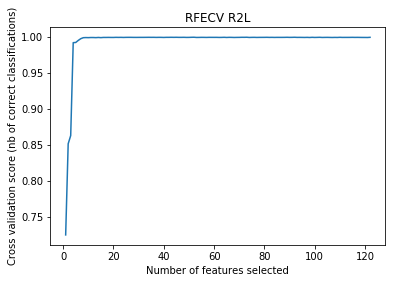

In [26]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.title('RFECV R2L')
plt.plot(range(1, len(rfecv_r2l.grid_scores_) + 1), rfecv_r2l.grid_scores_)
plt.show()

In [27]:
print(rfecv_r2l.grid_scores_)

[0.7252042  0.85153127 0.86291593 0.99167372 0.9919371  0.99476142
 0.99717587 0.99855138 0.99872692 0.9986245  0.9988001  0.99878546
 0.99863913 0.99888788 0.9986391  0.99891716 0.99890252 0.99896106
 0.99890252 0.99888788 0.99903422 0.99896105 0.99901959 0.99890253
 0.9990196  0.99904886 0.99903423 0.99897569 0.99896105 0.99899033
 0.99900496 0.99900493 0.99903421 0.99907812 0.99903421 0.99906348
 0.99896105 0.99903422 0.9990196  0.99890252 0.99904885 0.99903422
 0.9991074  0.9990342  0.99910738 0.99900495 0.99901958 0.99907812
 0.99894641 0.99897567 0.99910739 0.99918055 0.99890252 0.99894642
 0.99903422 0.99900495 0.99893178 0.99903421 0.99901959 0.99900496
 0.99901958 0.99891714 0.99896105 0.99909276 0.99888788 0.99904885
 0.99899031 0.99887326 0.99896105 0.99899032 0.99910738 0.99907811
 0.99916591 0.99888789 0.99900494 0.99904885 0.99891716 0.99899033
 0.99900496 0.99901958 0.99909274 0.99896104 0.99903421 0.99893179
 0.99900497 0.99899031 0.99899031 0.99901959 0.99910739 0.9989

14个左右

In [19]:
class_weights={0:1,3:676.8}
R2L_clf = RandomForestClassifier(random_state=0,class_weight=class_weights)

rfe_r2l = RFE(estimator=R2L_clf, n_features_to_select=14, step=1)
rfe_r2l.fit(X_R2L, Y_R2L)
X_rfer2l=rfe_r2l.transform(X_R2L)
true=rfe_r2l.support_
rfecolindex_r2l=[i for i, x in enumerate(true) if x]
rfecolname_r2l=list(colNames[i] for i in rfecolindex_r2l)

## U2R

In [29]:
class_weights={0:1,4:12950}
U2R_clf = RandomForestClassifier(random_state=0,class_weight=class_weights)

rfecv_u2r = RFECV(estimator=U2R_clf,step=1,cv=10,scoring='accuracy')
rfecv_u2r.fit(X_U2R, Y_U2R)

RFECV(cv=10,
   estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 1, 4: 12950},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

In [30]:
print("Optimal number of features : %d" % rfecv_u2r.n_features_)
print("Ranking of features : %s" % rfecv_u2r.ranking_)

Optimal number of features : 102
Ranking of features : [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 14  1  1 17
  1 16 15 20  1  1  1  1  1  5  7  1  1  1  1  1  1  1  1  2  1  1  1  1
  1  1  1  1  1  1  4  1  1  1 18  1  1  1 12 13  1  1  1  3 19 11  1  1
  9  1  1  6  1  1  1  1  1  1  1  1  8 10  1  1  1  1  1  1  1  1  1  1
  1 21]


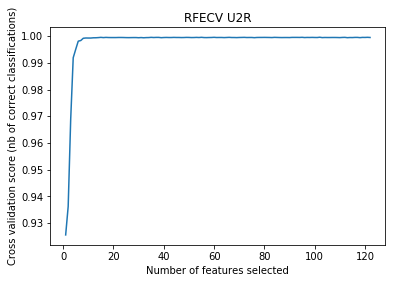

In [31]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.title('RFECV U2R')
plt.plot(range(1, len(rfecv_u2r.grid_scores_) + 1), rfecv_u2r.grid_scores_)
plt.show()

In [32]:
print(rfecv_u2r.grid_scores_)

[0.92552843 0.93621169 0.96891589 0.99192879 0.99508911 0.99813058
 0.99836799 0.99921358 0.99931746 0.99930261 0.99930262 0.99939164
 0.99940648 0.99946584 0.99955487 0.99946584 0.99954002 0.99949552
 0.99948068 0.99948068 0.99948068 0.99951035 0.99951035 0.99949552
 0.99946584 0.999451   0.99946583 0.99948068 0.99948067 0.99942133
 0.99948067 0.99940649 0.99946585 0.99948068 0.99955487 0.99949553
 0.99954004 0.99954003 0.99943616 0.99949552 0.99952518 0.99949551
 0.99949551 0.99954003 0.99951036 0.99951035 0.99948068 0.99949551
 0.99954003 0.99952519 0.99948067 0.99949551 0.99954002 0.99949552
 0.99956971 0.99948068 0.99946584 0.99949552 0.99951035 0.9995697
 0.99949552 0.99951035 0.99951035 0.99946584 0.99951035 0.99955486
 0.99949551 0.99949552 0.99946584 0.99951036 0.99952519 0.99955486
 0.99949551 0.99951035 0.99951035 0.99943617 0.99951035 0.9995252
 0.99952519 0.99954003 0.99952519 0.99951035 0.99948068 0.99955487
 0.99952519 0.99949551 0.99948068 0.99949552 0.99949551 0.999480

9个特征左右

In [20]:
class_weights={0:1,4:12950}
U2R_clf = RandomForestClassifier(random_state=0,class_weight=class_weights)

rfe_u2r = RFE(estimator=U2R_clf, n_features_to_select=15, step=1)
rfe_u2r.fit(X_U2R, Y_U2R)
X_rfeu2r=rfe_u2r.transform(X_U2R)
true=rfe_u2r.support_
rfecolindex_u2r=[i for i, x in enumerate(true) if x]
rfecolname_u2r=list(colNames[i] for i in rfecolindex_u2r)

## Normal

In [34]:
class_weights={0:10,1:1,2:1,3:1,4:1}
clf = RandomForestClassifier(random_state=0,class_weight=class_weights)
rfecv = RFECV(estimator=clf,step=1,cv=10,scoring='accuracy')
rfecv.fit(X, Y)

print("Optimal number of features : %d" % rfecv.n_features_)
print("Ranking of features : %s" % rfecv.ranking_)

Optimal number of features : 51
Ranking of features : [ 1  1  1 17  1 25  1  1  1  1  1 22  1  1 15  2 70 69  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 11 13 33 62  9 68 53
 54 18 23 31 36  1 27  1  1 67 40  1  1  1  4 61 52  1 72 56 66 10 38 55
 64 58 41  6 32 28 57 65 48 45 50 16 35  1  7 24 39 59  1 46 30 60 47  3
 49 21 34 51 29  1 42 19 14 63  5 12 71 37 43 26  1  1  8  1  1  1 20 44
  1  1]


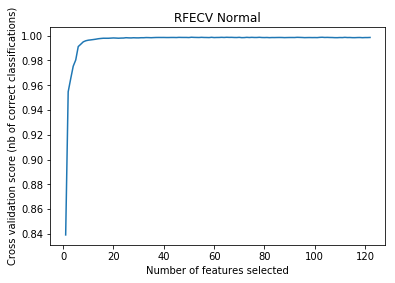

In [35]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.title('RFECV Normal')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [36]:
print(rfecv.grid_scores_)

[0.8392749  0.95475987 0.9652783  0.97538314 0.98042393 0.99123629
 0.99311762 0.99505448 0.99591975 0.99638809 0.99662627 0.99690408
 0.99719781 0.99756297 0.99777732 0.99795989 0.99793608 0.99794403
 0.9980631  0.99819009 0.99809483 0.99797578 0.99808691 0.99812661
 0.99838856 0.99826155 0.998206   0.99834887 0.99826949 0.9982536
 0.99838063 0.99837269 0.99850763 0.99846793 0.99838856 0.99849177
 0.99856321 0.99858702 0.99857113 0.99857907 0.99853146 0.99853143
 0.99857907 0.99857907 0.99852349 0.99865845 0.99861083 0.99859494
 0.99859495 0.99851555 0.99876165 0.99864258 0.99859494 0.99855526
 0.99869021 0.99857907 0.99855525 0.99849172 0.99871402 0.99849971
 0.99857115 0.99858701 0.99869021 0.99857907 0.99872196 0.99863464
 0.99867433 0.99856319 0.99853937 0.99868226 0.99844412 0.99849176
 0.99868227 0.99853938 0.99867434 0.9985632  0.99856319 0.99870608
 0.99854733 0.9984997  0.99857113 0.99843621 0.99853145 0.99850765
 0.99855525 0.99857907 0.99855526 0.99845206 0.99851559 0.99855

In [21]:
class_weights={0:10,1:1,2:1,3:1,4:1}
clf = RandomForestClassifier(random_state=0,class_weight=class_weights)

rfe_normal = RFE(estimator=clf, n_features_to_select=16, step=1)
rfe_normal.fit(X, Y)
X_rfe=rfe_normal.transform(X)
true=rfe_normal.support_
rfecolindex_normal=[i for i, x in enumerate(true) if x]
rfecolname_normal=list(colNames[i] for i in rfecolindex_normal)

In [22]:
print('Features selected for DoS:',rfecolname_DoS)
print()
print('Features selected for Probe:',rfecolname_Probe)
print()
print('Features selected for R2L:',rfecolname_r2l)
print()
print('Features selected for U2R:',rfecolname_u2r)
print()
print('Features selected for NORMAL:',rfecolname_normal)

Features selected for DoS: ['src_bytes', 'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'num_compromised', 'count', 'srv_count', 'srv_serror_rate', 'dst_host_srv_count', 'dst_host_diff_srv_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Protocol_type_icmp', 'Protocol_type_tcp', 'service_domain_u', 'service_ecr_i', 'service_http', 'flag_S0']

Features selected for Probe: ['src_bytes', 'dst_bytes', 'logged_in', 'rerror_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_rerror_rate', 'Protocol_type_tcp', 'service_domain_u', 'service_http', 'service_private']

Features selected for R2L: ['src_bytes', 'dst_bytes', 'hot', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'Protocol_type_tcp', 'Protocol_type_udp'

In [30]:
# 将四个变量的值取并集
combined_features = set(rfecolname_DoS) | set(rfecolname_Probe) | set(rfecolname_r2l) | set(rfecolname_u2r) | set(rfecolname_normal)

# 将并集转换为列表，以便输出到新变量中
combined_features_list = list(combined_features)

# 输出到新变量column中
column = combined_features_list
print(column)

# 计算列表长度
num_items = len(column)

# 输出列表中的项数
print("column列表中的项数为:", num_items)

['duration', 'Protocol_type_udp', 'dst_host_srv_diff_host_rate', 'Protocol_type_tcp', 'flag_S0', 'dst_host_diff_srv_rate', 'dst_host_rerror_rate', 'logged_in', 'dst_host_same_src_port_rate', 'src_bytes', 'rerror_rate', 'service_http', 'count', 'Protocol_type_icmp', 'dst_host_same_srv_rate', 'is_guest_login', 'srv_count', 'dst_host_srv_count', 'service_ecr_i', 'dst_host_srv_rerror_rate', 'srv_serror_rate', 'dst_bytes', 'dst_host_count', 'dst_host_serror_rate', 'service_eco_i', 'same_srv_rate', 'service_finger', 'srv_diff_host_rate', 'wrong_fragment', 'dst_host_srv_serror_rate', 'service_domain_u', 'service_private', 'service_smtp', 'hot', 'num_compromised']
column列表中的项数为: 35


In [31]:
# 将数据集分割为特征（X）和目标变量（Y）
# assign X as a dataframe of feautures and Y as a series of outcome variables
X_RFE = newdf[combined_features_list]
Y_RFE = newdf.label

X_test_RFE = newdf_test[combined_features_list]
Y_test_RFE = newdf_test.label
#colNames 就是一个包含 X 中所有列名称的列表
colNames=list(X_RFE)

In [32]:
colNames

['duration',
 'Protocol_type_udp',
 'dst_host_srv_diff_host_rate',
 'Protocol_type_tcp',
 'flag_S0',
 'dst_host_diff_srv_rate',
 'dst_host_rerror_rate',
 'logged_in',
 'dst_host_same_src_port_rate',
 'src_bytes',
 'rerror_rate',
 'service_http',
 'count',
 'Protocol_type_icmp',
 'dst_host_same_srv_rate',
 'is_guest_login',
 'srv_count',
 'dst_host_srv_count',
 'service_ecr_i',
 'dst_host_srv_rerror_rate',
 'srv_serror_rate',
 'dst_bytes',
 'dst_host_count',
 'dst_host_serror_rate',
 'service_eco_i',
 'same_srv_rate',
 'service_finger',
 'srv_diff_host_rate',
 'wrong_fragment',
 'dst_host_srv_serror_rate',
 'service_domain_u',
 'service_private',
 'service_smtp',
 'hot',
 'num_compromised']

In [33]:
from sklearn import preprocessing
#全部特征
scaler8 = preprocessing.StandardScaler().fit(X_RFE)
X_RFE=scaler8.transform(X_RFE) 

scaler9 = preprocessing.StandardScaler().fit(X_test_RFE)
X_test_RFE=scaler9.transform(X_test_RFE) 

RFE（递归特征消除）：
RFE 是一种特征选择方法，它通过逐步剔除不重要的特征来选择最优的特征子集。
在 NSL-KDD 数据集中，您可以使用 RFE 来排除那些对入侵检测任务不太相关的特征。
PCA（主成分分析）：
PCA 是一种降维技术，它将高维数据映射到低维空间，保留最重要的特征。
在 NSL-KDD 数据集中，您可以使用 PCA 来减少特征的维度，同时保留数据的主要信息。
结合方法：
首先，使用 RFE 从 NSL-KDD 数据集中选择一部分特征，这些特征对入侵检测任务有较高的相关性。
然后，将选定的特征输入到 PCA 中，将其映射到低维空间。
最终，您将得到一个具有较少特征且保留主要信息的数据集。

In [34]:
from sklearn.ensemble import RandomForestClassifier
start_time = time.time()

clf=RandomForestClassifier(random_state=0)
clf.fit(X_RFE, Y_RFE)
end_time = time.time()
# 计算执行时间
training_time = end_time - start_time
print(f"训练时间: {training_time:.2f} 秒")

训练时间: 0.66 秒


In [35]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
# 使用 cross_val_predict 进行交叉验证预测
y_pred = cross_val_predict(clf, X_test_RFE, Y_test_RFE, cv=10)

# 混淆矩阵
pd.crosstab(Y_test_RFE, y_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])



Predicted attacks,0,1,2,3,4
Actual attacks,,,,,
0,9580,11,8,109,3
1,20,7433,5,0,0
2,31,8,2377,2,3
3,129,2,3,2616,4
4,18,0,2,18,162


In [36]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,f1_score
print(classification_report(Y_test_RFE, y_pred, digits=3))

             precision    recall  f1-score   support

          0      0.980     0.987     0.983      9711
          1      0.997     0.997     0.997      7458
          2      0.992     0.982     0.987      2421
          3      0.953     0.950     0.951      2754
          4      0.942     0.810     0.871       200

avg / total      0.983     0.983     0.983     22544



In [37]:
from sklearn.metrics import confusion_matrix

# 计算混淆矩阵
conf_matrix = confusion_matrix(Y_test_RFE, y_pred)

# 提取各分类的真正例、假正例、真负例、假负例
true_positives = np.diag(conf_matrix)
false_positives = np.sum(conf_matrix, axis=0) - true_positives
false_negatives = np.sum(conf_matrix, axis=1) - true_positives
true_negatives = np.sum(conf_matrix) - (true_positives + false_positives + false_negatives)

# 计算各分类的准确率
class_accuracies = true_positives / (true_positives + false_negatives)

# 将整体准确率加入到列表中
overall_accuracy = np.sum(true_positives) / np.sum(conf_matrix)

# 创建包含准确率的数据帧
index = [str(i) for i in range(len(class_accuracies))] + ['Overall Accuracy']
df_ac = pd.DataFrame({'Accuracy': np.append(class_accuracies, overall_accuracy)}, index=index)

# 打印数据帧
print(df_ac)

                  Accuracy
0                 0.986510
1                 0.996648
2                 0.981826
3                 0.949891
4                 0.810000
Overall Accuracy  0.983322
